# Pytorch Tutorial

Pytorch is a popular deep learning framework and it's easy to get started.

In [5]:
import torch
from torch import nn
import torch.utils.data as data
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
from tqdm import tqdm
import time
import matplotlib.pyplot as plt

BATCH_SIZE = 128
NUM_EPOCHS = 10

First, we read the mnist data, preprocess them and encapsulate them into dataloader form.

In [2]:
# preprocessing
normalize = transforms.Normalize(mean=[.5], std=[.5])
transform = transforms.Compose([transforms.ToTensor(), normalize])

# download and load the data
train_dataset = torchvision.datasets.MNIST(root='./mnist/', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./mnist/', train=False, transform=transform, download=False)

# encapsulate them into dataloader form
train_loader = data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
test_loader = data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, drop_last=True)

Then, we define the model, object function and optimizer that we use to classify.

In [3]:
class SimpleNet(nn.Module):
# TODO:define model
    def __init__(self,in_channels,out_channels):
        super(SimpleNet,self).__init__()
        self.conv1 = nn.Conv2d(in_channels,6,kernel_size=5,padding=0,bias=True)
        self.bn1 = nn.BatchNorm2d(6)
        self.pool1 = nn.MaxPool2d(kernel_size=2,stride=2)
        self.conv2 = nn.Conv2d(6,16,kernel_size=5,padding=0,bias=True)
        self.bn2 = nn.BatchNorm2d(16)
        self.pool2 = nn.MaxPool2d(kernel_size=2,stride=2)
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(in_features=16*4*4,out_features=120)
        self.linear2 = nn.Linear(in_features=120,out_features=84)
        self.linear3 = nn.Linear(in_features=84,out_features=10)
    def forward(self,x):
        out = self.pool1(F.relu(self.bn1(self.conv1(x))))
        out = self.pool2(F.relu(self.bn2(self.conv2(out))))
        out = self.flatten(out)
        out = F.relu(self.linear1(out))
        out = F.relu(self.linear2(out))
        out = self.linear3(out)
        return out

    
model = SimpleNet(1,10)

# TODO:define loss function and optimiter
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.001,momentum=0.7)

device = "cpu"

Next, we can start to train and evaluate!

  1%|          | 3/468 [00:00<00:19, 23.38it/s]At epoch 1
train_loss: 0.199019  train_acc: 0.946898 
test_loss: 0.167157  test_acc: 0.954327
  1%|          | 3/468 [00:00<00:18, 24.86it/s]At epoch 2
train_loss: 0.172290  train_acc: 0.952524 
test_loss: 0.146226  test_acc: 0.959435
  0%|          | 2/468 [00:00<00:26, 17.44it/s]At epoch 3
train_loss: 0.153935  train_acc: 0.956881 
test_loss: 0.131202  test_acc: 0.963742
  1%|          | 3/468 [00:00<00:21, 21.33it/s]At epoch 4
train_loss: 0.139464  train_acc: 0.960787 
test_loss: 0.119438  test_acc: 0.966847
  0%|          | 2/468 [00:00<00:28, 16.64it/s]At epoch 5
train_loss: 0.128545  train_acc: 0.963792 
test_loss: 0.110557  test_acc: 0.969151
  1%|          | 3/468 [00:00<00:19, 24.01it/s]At epoch 6
train_loss: 0.118994  train_acc: 0.965745 
test_loss: 0.101253  test_acc: 0.971154
  0%|          | 2/468 [00:00<00:38, 12.01it/s]At epoch 7
train_loss: 0.111230  train_acc: 0.968516 
test_loss: 0.094790  test_acc: 0.973257
  0%|        

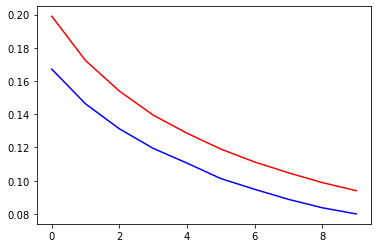

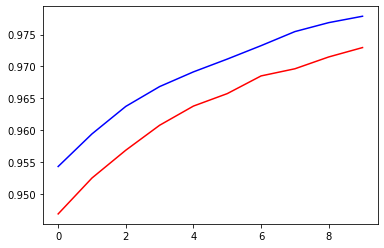

In [6]:
# train and evaluate
train_loss_ls, train_acc_ls = [], []
test_loss_ls, test_acc_ls = [], []
for epoch in range(NUM_EPOCHS):
    train_acc, train_loss = 0.0, 0.0
    model.train()
    count = 0
    for images, labels in tqdm(train_loader):
        # TODO:forward + backward + optimize
        images,labels = images.to(device), labels.to(device)
        pred = model(images)
        loss = criterion(pred,labels)
        train_loss += loss.item()
        train_acc += (pred.argmax(axis=1)==labels).sum().item()/BATCH_SIZE
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        count += 1
    train_loss /= count
    train_acc /= count
    train_loss_ls.append(train_loss)
    train_acc_ls.append(train_acc)
    
    count = 0
    test_loss, test_acc = 0.0, 0.0
    with torch.no_grad():
        for images, labels in tqdm(test_loader):
            images, labels = images.to(device), labels.to(device)
            pred = model(images)
            test_loss += criterion(pred,labels).item()
            test_acc += (pred.argmax(axis=1)==labels).sum().item()/BATCH_SIZE
            count += 1
    test_loss /= count
    test_acc /= count
    test_loss_ls.append(test_loss)
    test_acc_ls.append(test_acc)

    print("At epoch %d\ntrain_loss: %f  train_acc: %f \ntest_loss: %f  test_acc: %f"
         %((epoch+1),train_loss, train_acc, test_loss, test_acc))

plt.plot(train_loss_ls,'r',test_loss_ls,'b')
plt.figure()
plt.plot(train_acc_ls,'r',test_acc_ls,'b')

#### Q5:
Please print the training and testing accuracy.